In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
class Perceptron:        
    """Perceptron class

        Args:
            N: Number of inputs
            M: Number of Columns in inputs  
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N, M,  alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        # define iputs
        self.W = np.array([[np.random.uniform(-1, 1)] for _ in range(M)])

        self.b = [[np.random.uniform(-1, 1)] ]
        self.M = M
        self.N = N
        self.alpha = alpha
        self.L = []
            
    def sigmoid(self, x):
        #TO DO: Apply the sigmoid function
        return 1/(1+np.exp(-x))
    
    def returnLoss(self): 
        return np.array(self.L)
  
    def Loss(self, Y, y):
        # Applies the Loss function 
        return -( (y * np.log(Y)) + ((1 - y)  * np.log(1 - Y)) )

    def predict(self, x):
        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """        
        #TO DO: Define the predict function
        return self.sigmoid(np.dot(self.W.T, x) + self.b)
        
    
    def perceptronStep(self, X, y):
        """
            The perceptron basic step. It updates the weights based on the input data.
            
            Args:
                X: Array with the input data
                y: Data labels
        """
        # TO DO: Implement the perceptron algorithm.
       
        J = 0
        dw1 = 0
        db = 0
        dw2 = 0 
        #print(X)
        
          #print(X[i])
          #print(X[i][1])
        Y = self.predict(X)
        #print("W shape: ", self.W.T.shape)
        #print(np.shape(Y))

        L = self.Loss(Y, y)
        J = np.sum(L) / self.N

        #print("prediction: ", Y)
        #print("loss: ",L)
        #print("sum of loss: ", J)

        dy = Y - y
        #print(dy)
  
        #print(X[0])
        #dw1s = X[0] * dy
        #dw1 = np.sum(dw1s) / self.N
        #print(dw1)
        dw = (1/self.N) * np.dot(X, dy.T)
        #dw2s = X[1] * dy
        #dw2 = np.sum(dw2s) / self.N

        #print(dw2)
        db = np.sum(dy) / self.N
        #print(dw1, dw2, db)
        
        #dw1 /= self.N
        #dw2 /= self.N
        #db /= self.N
        

        #print(dw1, dw2, db)

        #print(self.W.shape)
        #self.W[0][0] -= dw1 * self.alpha
        #print(self.W[0][0])
        #self.W[1][0] -= dw2 * self.alpha
        self.W -= dw * self.alpha
        #print(self.W[1][0])
        self.b -= db * self.alpha

        #print(J)
        self.L.append(J)
        #print(self.b)
      # ajustar los pesos 
    
    def train(self, X, y, epochs = 10):
        """
            Runs the perceptron step a specified number of epochs
            
            Args:
                X: input data
                y: labels
                epochs: The number of times the step is executed
        """
      
        # loop over the desired epochs
        for epoch in range(epochs):
            #print(f"Epoch {epoch}")
            self.perceptronStep(X, y)
        

        

In [3]:
np.random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
X = np.array([[0,0],[0,1], [1,0], [1,1]])
print(X, X.shape)
y = np.array([[0],[0], [0], [1]])
print(y, y.shape)
p = Perceptron(4, 2, 0.2)
print(f"Initial weights {p.W}")
print(f"Initial bias {p.b}")

# Test training with different epochs
epochs = 10000
p.train(X.T, y.T, epochs)

print(f"Weights after training {p.W}")
print(f"Bias after training {p.b}")

loss = p.returnLoss()
#print(loss)
# Test your model with a prediction

[[0 0]
 [0 1]
 [1 0]
 [1 1]] (4, 2)
[[0]
 [0]
 [0]
 [1]] (4, 1)
Initial weights [[-0.25091976]
 [ 0.90142861]]
Initial bias [[0.4639878836228102]]
Weights after training [[8.8200686 ]
 [8.82006862]]
Bias after training [[-13.40047774]]


In [4]:
print("Probabilidad de que sea 0: " , 1 - p.predict(X[0]))
print("Probabilidad de que sea 0: " , 1 - p.predict(X[1]))
print("Probabilidad de que sea 0: " , 1 - p.predict(X[2]))
print("Probabilidad de que sea 1: " , p.predict(X[3]))

Probabilidad de que sea 0:  [[0.99999849]]
Probabilidad de que sea 0:  [[0.98985331]]
Probabilidad de que sea 0:  [[0.98985331]]
Probabilidad de que sea 1:  [[0.98579227]]


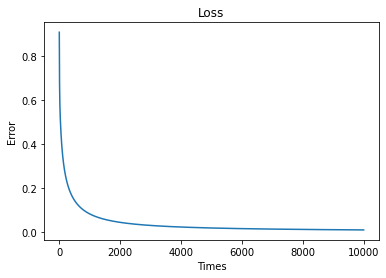

In [5]:
##plot the error

plt.plot(loss)
plt.xlabel("Times")
plt.ylabel("Error")
plt.title('Loss')
plt.show()

In [6]:
np.random.seed(42)

# The following data is used to train the perceptron for the OR operation
# Test your code with the OR operation
XO = np.array([[0,0],[0,1], [1,0], [1,1]])
print(XO, XO.shape)
yo = np.array([[0],[1], [1], [1]])
print(yo, yo.shape)
po = Perceptron(4, 2, 0.05)
print(f"Initial weights {po.W}")
print(f"Initial bias {po.b}")

# Test training with different epochs
epochs = 10000
po.train(XO.T, yo.T, epochs)

print(f"Weights after training {po.W}")
print(f"Bias after training {po.b}")

lossO = po.returnLoss()
#print(loss)
# Test your model with a prediction

[[0 0]
 [0 1]
 [1 0]
 [1 1]] (4, 2)
[[0]
 [1]
 [1]
 [1]] (4, 1)
Initial weights [[-0.25091976]
 [ 0.90142861]]
Initial bias [[0.4639878836228102]]
Weights after training [[7.23674862]
 [7.24047519]]
Bias after training [[-3.1466974]]


In [7]:
print("Probabilidad de que sea 0: " , 1 - po.predict(XO[0]))
print("Probabilidad de que sea 1: " , po.predict(XO[1]))
print("Probabilidad de que sea 1: " , po.predict(XO[2]))
print("Probabilidad de que sea 1: " , po.predict(XO[3]))

#Prints the errors in each iteration of the training 
#print("Errores : ")
#po.printError()

Probabilidad de que sea 0:  [[0.95877839]]
Probabilidad de que sea 1:  [[0.98359742]]
Probabilidad de que sea 1:  [[0.98353718]]
Probabilidad de que sea 1:  [[0.999988]]


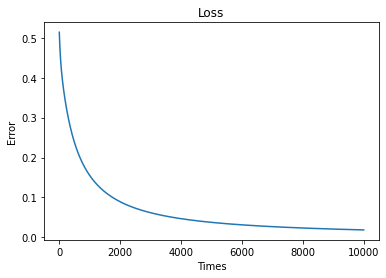

In [8]:
##plot the error

plt.plot(lossO)
plt.xlabel("Times")
plt.ylabel("Error")
plt.title('Loss')
plt.show()